In [112]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
#%%capture
! pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from scipy import stats

df = pd.read_csv("clean_df.csv")
df.dtypes
#Certains changements n'ont pas été sauvegardés correctement

Title            object
Type             object
Start airing      int64
Studios          object
Genres           object
Rating           object
Score           float64
Scored by         int64
Members           int64
Favorites         int64
Niveau           object
Movie             int64
Music             int64
ONA               int64
OVA               int64
Special           int64
TV                int64
dtype: object

In [113]:
df[["Title", "Studios","Genres","Type","Rating","Niveau"]] = df[["Title", "Studios","Genres","Type","Rating","Niveau"]].astype("string")

In [114]:
#Cherchons s'il existe une corrélation particulière entre le score, le nombre de membres et le nombre de choix en tant que favori
df[["Favorites","Members","Score"]].corr()

,Favorites,Members,Score
Favorites,1.000000,0.821251,0.409841
Members,0.821251,1.000000,0.408320
Score,0.409841,0.408320,1.000000


(0.0, 2624617.7634937842)

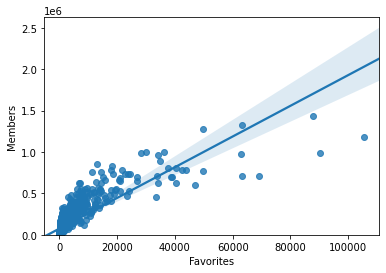

In [115]:
#On remarque qu'une grosse corrélation positive existe entre les favoris et le nombre de membres
#on cherche à le vérifier avec une représentation graphique
sns.regplot(x="Favorites", y="Members", data=df)
plt.ylim(0,)

#malgré quelques valeurs extrêmes on remarque la corrélation et la pente "montante" synonyme de positivité

<AxesSubplot:xlabel='Type', ylabel='Score'>

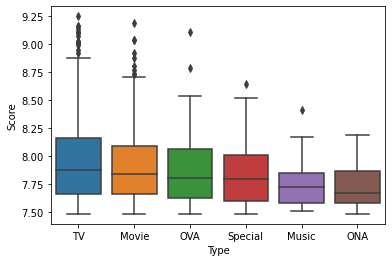

In [116]:
#Autre piste d'exploration : répartition des scores en fonction des différents types
sns.boxplot(x="Type", y="Score", data=df)

#Principalement des séries, films et OVA, les séries ont la meilleure moyenne de note

In [117]:
#Etude d'indicateurs basiques
df.describe(include=['string'])

,Title,Type,Studios,Genres,Rating,Niveau
count,1505,1505,1505,1505,1505,1505
unique,1505,6,199,978,5,3
top,Kokoro Connect,TV,Sunrise,"Slice of Life,Comedy",PG-13,Mediocre
freq,1,817,105,15,1006,1084


In [118]:
#Voir les modalités de la variable Type
df['Type'].unique()

<StringArray>
['TV', 'Movie', 'OVA', 'Special', 'Music', 'ONA']
Length: 6, dtype: string

In [119]:
#Je vérifie qu'il soit pertinent de garder toutes les modalités
#(aucun type n'est négligeable)
df['Type'].value_counts()

TV         817
Movie      320
OVA        178
Special    148
ONA         33
Music        9
Name: Type, dtype: Int64

In [120]:
#Autre façon en markdown avec titre et nom d'index
Type_values = df['Type'].value_counts().to_frame()
Type_values.rename(columns={'Type': 'Fréquence'}, inplace=True)
Type_values.index.name = 'Types'
Type_values

,Fréquence
Types,
TV,817
Movie,320
OVA,178
Special,148
ONA,33
Music,9


In [121]:
#Visualisation des scores et des membres moyens groupés par type
df_group_one = df[['Type','Score','Members']]
df_group_one = df_group_one.groupby(['Type'],as_index=False).mean()
df_group_one

#On remarque les séries sont les plus populaires
#(meilleur score et nombre d'abonnés)
#inversement pour les musiques, sûrement car le blog s'est spécialisé dans les oeuvres du petit et grand écran 

,Type,Score,Members
0,Movie,7.906938,70669.396875
1,Music,7.790000,29534.000000
2,ONA,7.711818,47545.181818
3,OVA,7.865000,44720.544944
4,Special,7.827770,41442.547297
5,TV,7.950881,172719.319461


In [122]:
#Je rajoute la classification pour voir laquelle est la plus utilisée 
#(donne aussi un indice sur l'âge du public votant)
#résultat : dépend des types, il n'y a pas de restriction qui se démarque sauf une nette augmentation pour les séries TV à caractère violent
#Synonyme d'une possible préférence pour ce type d'oeuvre
df_gptest = df[['Type','Members','Rating']]
grouped_test1 = df_gptest.groupby(['Type','Rating'],as_index=False).mean()
grouped_test1

,Type,Rating,Members
0,Movie,G,63811.568182
1,Movie,None,18325.166667
2,Movie,PG,101328.952381
3,Movie,PG-13,72690.331551
4,Movie,R,64121.725806
5,Music,G,35640.571429
6,Music,PG-13,8161.000000
7,ONA,PG,12662.000000
8,ONA,PG-13,54300.583333
9,ONA,R,34350.428571


In [123]:
#Je réalise un groupe pivot pour en savoir plus
grouped_pivot = grouped_test1.pivot(index='Type',columns='Rating')
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot
#Les oeuvres disponibles uniquement sur internet (ONA) sont plus suivies lorsque la restriction n'est pas maximale donc leurs contenus ne doit pas s'adresser à un public âgé
#Les OVA et les spéciaux sont préférés violents

Members                                              \
Rating              G          None             PG          PG-13   
Type                                                                
Movie    63811.568182  18325.166667  101328.952381   72690.331551   
Music    35640.571429      0.000000       0.000000    8161.000000   
ONA          0.000000      0.000000   12662.000000   54300.583333   
OVA      16694.750000      0.000000   10424.500000   38339.343284   
Special  12224.750000      0.000000   31124.000000   40630.805310   
TV       21840.433333  51528.500000   53192.480000  167731.921245   

                        
Rating               R  
Type                    
Movie     64121.725806  
Music         0.000000  
ONA       34350.428571  
OVA       71977.815789  
Special   58581.727273  
TV       254275.869565

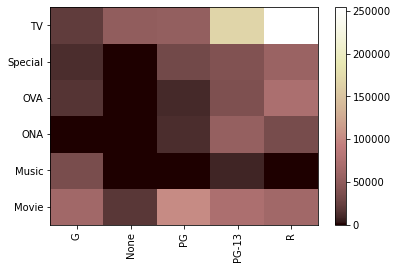

In [124]:
#Heatmap (beaucoup plus facile pour voir les résultats)
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='pink')

titre_ligne = grouped_pivot.columns.levels[1]
titre_colonne = grouped_pivot.index

ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

ax.set_xticklabels(titre_ligne, minor=False)
ax.set_yticklabels(titre_colonne, minor=False)

plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [125]:
#Pearson
pearson_coef, p_value = stats.pearsonr(df['Favorites'], df['Scored by'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
#coefficient Pearson élevé et une p-value = 0
# donc une corrélation significative entre les variables
#corrélation positive

The Pearson Correlation Coefficient is 0.8254487383642358  with a P-value of P = 0.0


In [126]:
pearson_coef, p_value = stats.pearsonr(df['Members'], df['Favorites'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
#coefficient Pearson élevé et une p-value = 0
# donc une corrélation significative entre les variables
#corrélation positive

The Pearson Correlation Coefficient is 0.8212506234858653  with a P-value of P = 0.0


In [127]:
pearson_coef, p_value = stats.pearsonr(df['Score'], df['Favorites'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
#coefficient Pearson très bas et une p-value > 1
# donc pas de corrélation significative

The Pearson Correlation Coefficient is 0.40984072167431235  with a P-value of P = 4.830940980323518e-62


In [128]:
pearson_coef, p_value = stats.pearsonr(df['Start airing'], df['Score'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
#coefficient Pearson très bas et une p-value < 0,05
# donc il existe peut-être des preuves de corrélation

The Pearson Correlation Coefficient is 0.08407104687356817  with a P-value of P = 0.0010963785614840113


In [129]:
df_gptest = df[['Start airing','Niveau','Members']]
grouped_test2=df_gptest[['Start airing', 'Niveau']].groupby(['Niveau'])
grouped_test2.head(2)

,Start airing,Niveau
0,2009,Excellent
1,2016,Excellent
50,2016,Bon
51,2012,Bon
421,1999,Mediocre
422,2011,Mediocre


In [130]:
grouped_test2.get_group('Excellent')['Start airing']>2000

0      True
1      True
2      True
3      True
4      True
5     False
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26    False
27    False
28    False
29     True
30    False
31     True
32     True
33     True
34     True
35     True
36    False
37     True
38     True
39     True
40     True
41     True
42     True
43     True
44     True
45     True
46     True
47     True
48     True
49     True
Name: Start airing, dtype: bool

In [131]:
df["Start airing"].min()

1970

In [133]:
group_names = ["Ancien","Récent"]
bins=[1970,2000,2020]
df['Start airing'].value_counts(bins)
df['Age'] = pd.cut(df['Start airing'], bins, labels=group_names, include_lowest=True )
df["Age"].value_counts()
#Les animés sortis avant l'an 2000 ne représente que 15% de la base
#et ils représentent environ 10% des notés "excellent"
#Ceux sont donc ceux qui étaient marquants avant l'essor d'internet
#De plus la proportion d'anciens parmi les excellents est supérieure à celle des plus récent : 4,4% pour les "anciens" contre 3,1% pour les "nouveaux"

Récent    1280
Ancien     225
Name: Age, dtype: int64

In [136]:
df_gptest2 = df[['Type','Score','Age']]
group_age = df_gptest2.groupby(['Type','Age'],as_index=False).mean()
grouped_pivot2 = group_age.pivot(index='Type',columns='Age')
grouped_pivot2 = grouped_pivot2.fillna(0)
grouped_pivot2
#Toutes les moyennes des anciens sont inférieures à celles des récents donc les autres anciennes oeuvres sont très mal classées 

Score          
Age        Ancien    Récent
Type                       
Movie    7.867018  7.915589
Music    7.560000  7.818750
ONA      0.000000  7.711818
OVA      7.859600  7.865882
Special  7.638333  7.835775
TV       7.860515  7.968928

In [137]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('Excellent')['Start airing'], grouped_test2.get_group('Bon')['Start airing'], grouped_test2.get_group('Mediocre')['Start airing'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)
#On trouve un F-test score assez élevé (signe de corrélation) et une petite P-value (signe de significativité)
#on peut interpréter cela comme le signe d'une corrélation entre la date de diffusion et le niveau de l'animé 

ANOVA results: F= 5.112490419887606 , P = 0.006126282488093168


In [138]:
#Separément
f_val, p_val = stats.f_oneway(grouped_test2.get_group('Excellent')['Start airing'], grouped_test2.get_group('Bon')['Start airing'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 1.7618507129072472 , P = 0.18511661424585618


In [139]:

f_val, p_val = stats.f_oneway(grouped_test2.get_group('Bon')['Start airing'],grouped_test2.get_group('Mediocre')['Start airing'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 6.054236726531413 , P = 0.013988607313342337


In [140]:

f_val, p_val = stats.f_oneway(grouped_test2.get_group('Mediocre')['Start airing'],grouped_test2.get_group('Excellent')['Start airing'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 4.911177765628092 , P = 0.026881721407456826


In [141]:
#importation pour la régression lineaire
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lm = LinearRegression()

In [142]:
#Je commence par chercher un bon modèle pour prévoir le score 

X=df[["Favorites"]]
Y=df["Score"]
lm.fit(X, Y)

print('The R-square is: ', lm.score(X, Y))
#Aucune variable quantitative n'a donné un résultat concluant


The R-square is:  0.16796941714252112


In [143]:
#Je prends donc les varibles avec le R² le plus élévé

X=df[["Members"]]
Y=df["Scored by"]
lm.fit(X, Y)

print('The R-square is: ', lm.score(X, Y))
#L'équation de la droite de regression est capable d'expliquer 97% de la distribution des valeurs de Scored by

The R-square is:  0.9719224715872175


In [144]:
X = df[['Members']]
Y = df['Scored by']
lm.fit(X,Y)

#extrait des réponses calculées (5 premières)
Yhat=lm.predict(X)
Yhat[0:5]

array([686905.15098079, 408632.61010066, 106946.3673321 , 102205.15914039,
       577086.65047754])

In [145]:
#Régression linéaire multiple
#Pour préciser mon mdèle je rajoute la variable Favorites
Z = df[['Members', 'Favorites']]
lm.fit(Z, df['Scored by'])
lm.intercept_

-6559.69616041585

In [146]:
lm.coef_

array([0.5666923 , 0.65632439])

(0.0, 1046071.488091698)

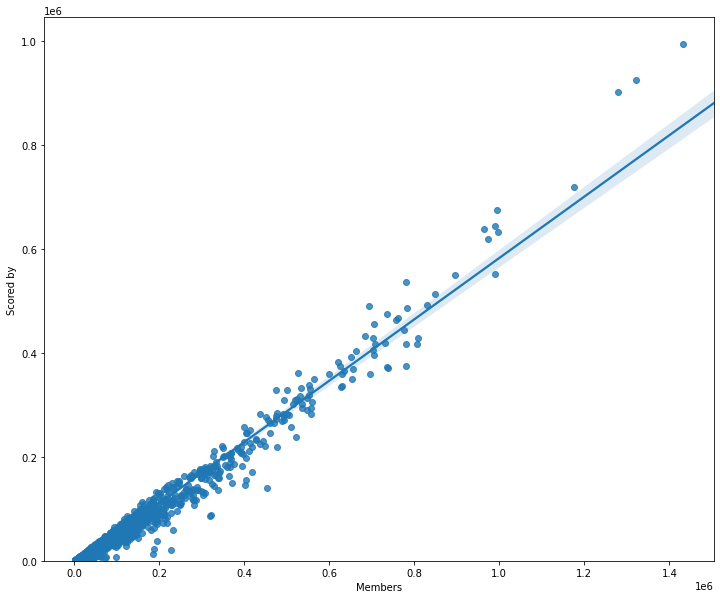

In [147]:
#Je vérifie que j'ai fais le bon choix en traçant la droite de régression
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="Members", y="Scored by", data=df)
plt.ylim(0,)

(0.0, 1043741.7901377511)

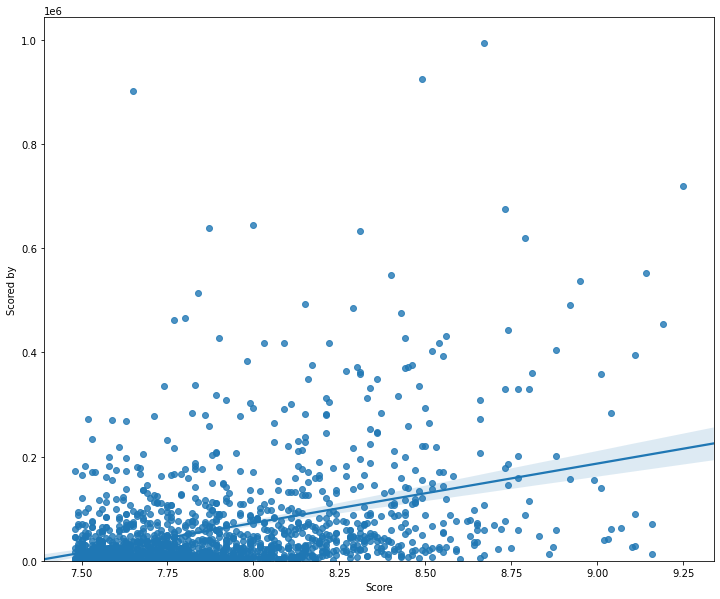

In [148]:
#Je souhaite saoir si le score peut etre un meilleur indicateur
plt.figure(figsize=(width, height))
sns.regplot(x="Score", y="Scored by", data=df)
plt.ylim(0,)

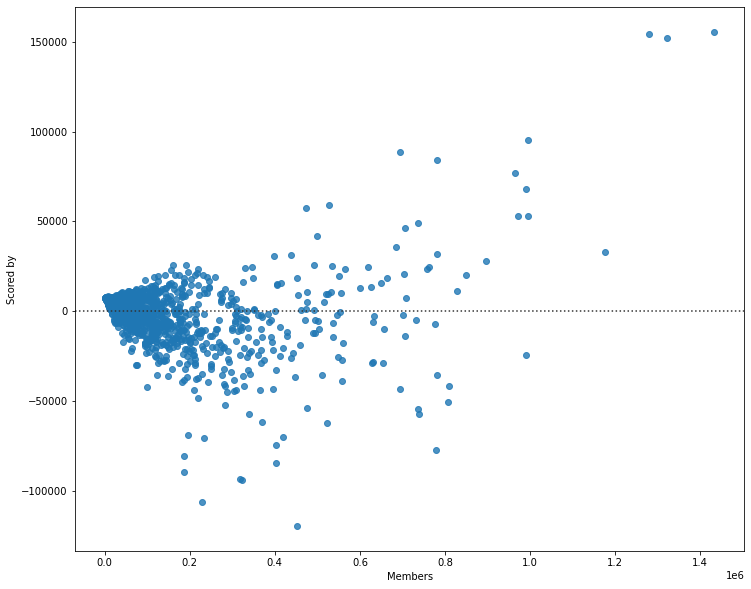

In [149]:
#tracé résiduel
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['Members'], df['Scored by'])
plt.show()
#malgré une concentration vers l'origine, le reste des valeurs est bien éparpillé
#ce qui prouve que notre modèle est correct

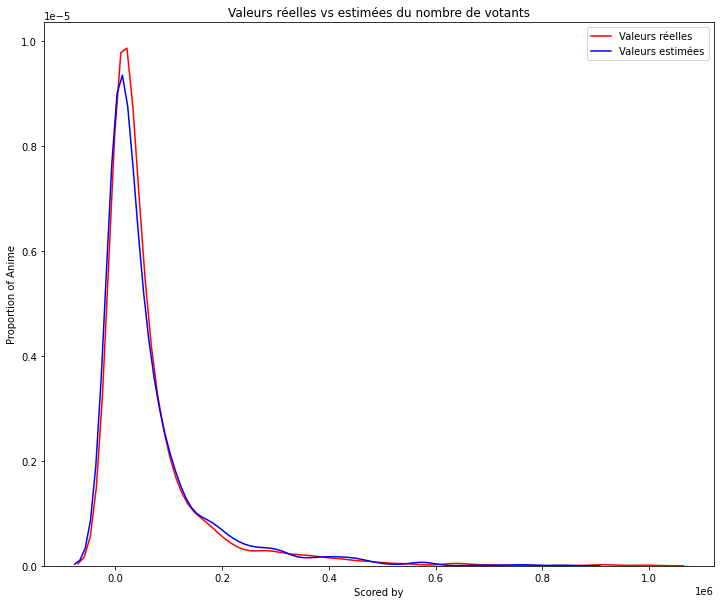

In [150]:
Y_hat = lm.predict(Z)
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['Scored by'], hist=False, color="r", label="Valeurs réelles")
sns.distplot(Yhat, hist=False, color="b", label="Valeurs estimées" , ax=ax1)


plt.title('Valeurs réelles vs estimées du nombre de votants')
plt.xlabel('Scored by')
plt.ylabel('Proportion of Anime')

plt.show()
plt.close()
#les lignes bleues et rouges sont très proches le modèle est donc efficace

In [151]:
#fonction pour visualiser
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Modèle polynomial avec Matplotlib pour estimer Scored by')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Scored by of Anime')

    plt.show()
    plt.close()

In [152]:
x = df['Members']
y = df['Scored by']

In [153]:
#équation du 3ème degré
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

           3             2
6.229e-15 x + 1.482e-07 x + 0.4771 x - 792.8


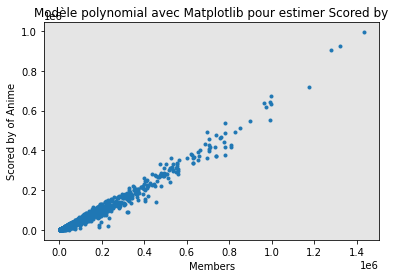

In [154]:
PlotPolly(p, x, y, 'Members')
#le graphique crée une diagonale quasi-parfaite

In [155]:
np.polyfit(x, y, 3)

array([ 6.22919384e-15,  1.48207953e-07,  4.77120663e-01, -7.92777177e+02])

           3             2
6.229e-15 x + 1.482e-07 x + 0.4771 x - 792.8


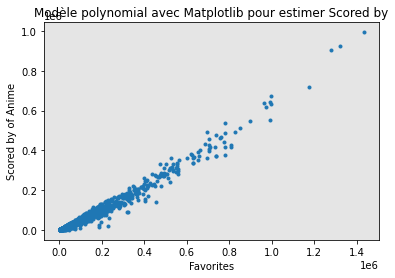

In [156]:
f1 = np.polyfit(x, y, 3)
p1 = np.poly1d(f1)
print(p)
PlotPolly(p1,x,y, 'Favorites')
#Pareil pour le nombre de favoris

In [157]:
#Modèle polynomial

from sklearn.preprocessing import PolynomialFeatures

In [158]:
pr=PolynomialFeatures(degree=2)
pr
Z_pr=pr.fit_transform(Z)
Z.shape

(1505, 2)

In [159]:
Z_pr.shape

(1505, 6)

In [160]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
pipe
pipe.fit(Z,y)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [161]:
ypipe=pipe.predict(Z)
ypipe[0:4]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([737982.12100369, 400868.48823419,  94097.73687882,  94849.50695726])

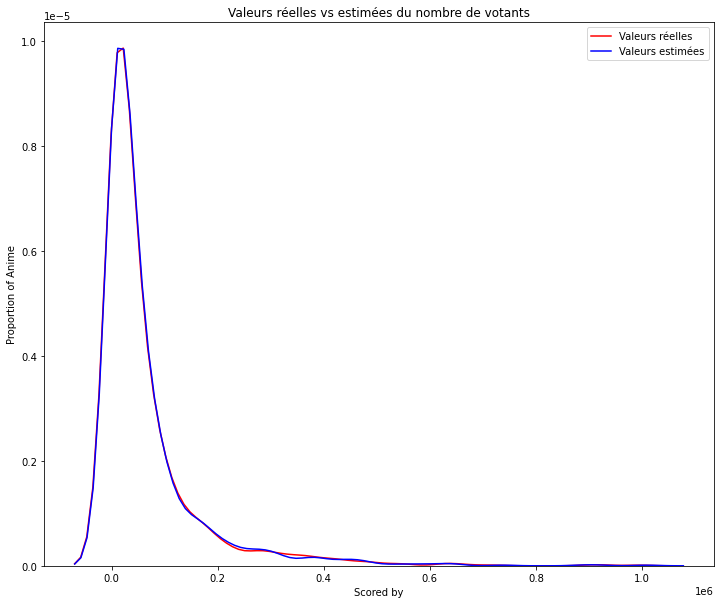

In [162]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['Scored by'], hist=False, color="r", label="Valeurs réelles")
sns.distplot(ypipe, hist=False, color="b", label="Valeurs estimées" , ax=ax1)


plt.title('Valeurs réelles vs estimées du nombre de votants')
plt.xlabel('Scored by')
plt.ylabel('Proportion of Anime')

plt.show()
plt.close()
#Les droites rouge et bleue sont confondues le modèle polynomial est le plus adapté pour prédire le nombre de votants

In [163]:
mse = mean_squared_error(df['Scored by'], Yhat)
print('Moyenne des moindres carrés de la régression linéaire: ', mse)

Moyenne des moindres carrés de la régression linéaire:  287125173.00227433


In [164]:
mse = mean_squared_error(df['Scored by'], Y_hat)
print('MMC régression linéaire multiple: ', mse)

MMC régression linéaire multiple:  279273958.60053194


In [165]:
mse = mean_squared_error(df['Scored by'], ypipe)
print('MMC du modèle polynomial: ', mse)

MMC du modèle polynomial:  177845337.9963825


In [166]:
#On remarque bien la différence entre les modèles, plus il y a de variables plus la moyenne des moindres carrés diminue
#plus elle diminue, plus le modèle est adéquat
#le modèle le plus précis est donc le polynomial
#Mais pour faire encore plus précis on peut ajouter du machine learning

In [167]:
df = pd.read_csv("dataanime.csv")
df=df._get_numeric_data()
df.head()

,Score,Scored by,Members,Favorites
0,9.25,719706,1176368,105387
1,9.19,454969,705186,33936
2,9.16,70279,194359,5597
3,9.16,12609,186331,1117
4,9.14,552791,990419,90365


In [168]:
%%capture
! pip install ipywidgets
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

In [169]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Scored by')
    plt.ylabel("Proportion d'animé")

    plt.show()
    plt.close()

In [170]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label="Données d'entrainement")
    plt.plot(xtest, y_test, 'go', label='Données de test')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='fonction de prédiction')
    plt.ylim([-10000, 60000])
    plt.ylabel('Scored by')
    plt.legend()

In [171]:
#On retire la variable à prédire
y_data = df['Scored by']
x_data=df.drop('Scored by',axis=1)

In [172]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("nombre de valeurs testées:", x_test.shape[0])
print("nombre de valeurs d'entrainements:",x_train.shape[0])

nombre de valeurs testées: 235
nombre de valeurs d'entrainements: 1328


In [173]:
from sklearn.linear_model import LinearRegression
lre=LinearRegression()
lre.fit(x_train[['Members']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [174]:
#les valeurs de test sont moins nombreuses donc le coefficient R² est plus petit
lre.score(x_test[['Members']], y_test)

0.9451766068640731

In [175]:
lre.score(x_train[['Members']], y_train)

0.9748231864312831

In [176]:
from sklearn.model_selection import cross_val_score
Rcross = cross_val_score(lre, x_data[['Members']], y_data, cv=4)
print("La moyenne des groupes est de ", Rcross.mean(), "et l'écart-type est" , Rcross.std())

La moyenne des groupes est de  0.9672545159563538 et l'écart-type est 0.0032570945104820766


In [177]:
-1 * cross_val_score(lre,x_data[['Members']], y_data,cv=4,scoring='neg_mean_squared_error')

array([7.44600710e+08, 2.08928129e+08, 1.60264052e+08, 7.04850817e+07])

In [178]:
from sklearn.model_selection import cross_val_predict

In [179]:
yhat = cross_val_predict(lre,x_data[['Members']], y_data,cv=4)
yhat[0:5]

array([666568.90236037, 397523.73705821, 105841.25628473, 101257.26413935,
       560391.92734271])

In [180]:
lr = LinearRegression()
lr.fit(x_train[['Members', 'Favorites', 'Score']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [181]:
yhat_train = lr.predict(x_train[['Members', 'Favorites', 'Score']])
yhat_train[0:5]

array([ -2060.69208321, 277374.22646567,  13869.38860694,   7141.47226268,
        -3016.40885947])

In [182]:
yhat_test = lr.predict(x_test[['Members', 'Favorites', 'Score']])
yhat_test[0:5]

array([31410.49572624, 85130.02453913,  5094.56182895, 10000.66072555,
        7777.70814185])

In [183]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

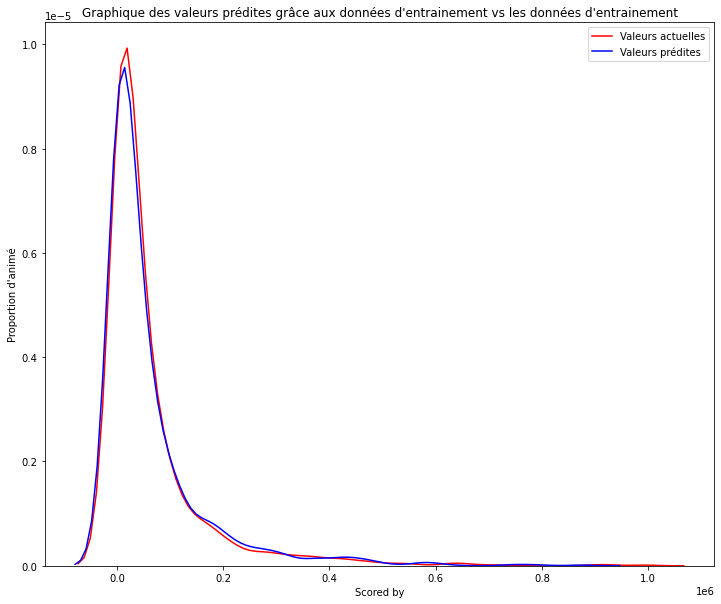

In [184]:
Title = "Graphique des valeurs prédites grâce aux données d'entrainement vs les données d'entrainement"
DistributionPlot(y_train, yhat_train, "Valeurs actuelles", "Valeurs prédites", Title)
#2 courbes quasi-confndues donc modèle significatif

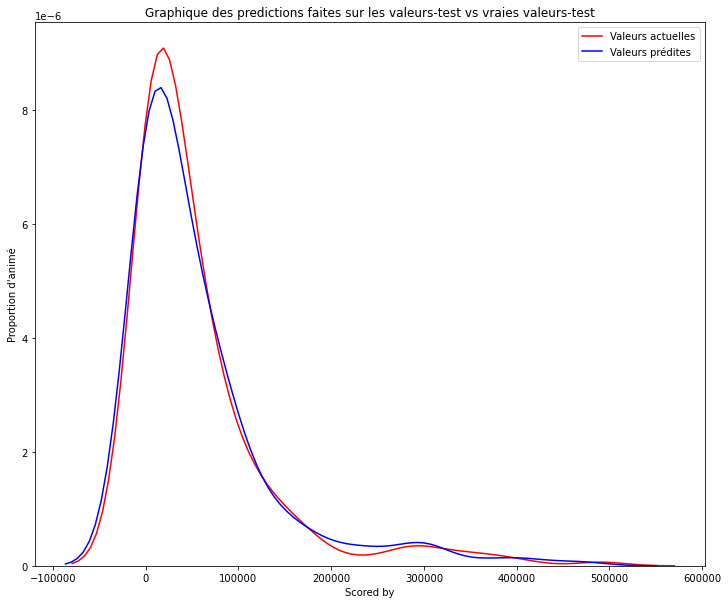

In [185]:
Title='Graphique des predictions faites sur les valeurs-test vs vraies valeurs-test'
DistributionPlot(y_test,yhat_test,"Valeurs actuelles","Valeurs prédites",Title)
#On observe quelques décalages entres les courbes car le modèle analyse de nouvelles données donc est un peu moins précis

In [186]:
from sklearn.preprocessing import PolynomialFeatures

In [187]:
#overfitting 55%
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [188]:
pr = PolynomialFeatures(degree=7)
x_train_pr = pr.fit_transform(x_train[['Members']])
x_test_pr = pr.fit_transform(x_test[['Members']])
pr

PolynomialFeatures(degree=7, include_bias=True, interaction_only=False)

In [189]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [190]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([37512.7973787 , 37511.06521678, 37708.88797936, 37819.30934931,
       37511.12382832])

In [191]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [37512.7973787  37511.06521678 37708.88797936 37819.30934931]
True values: [25348  1956 61237 46886]


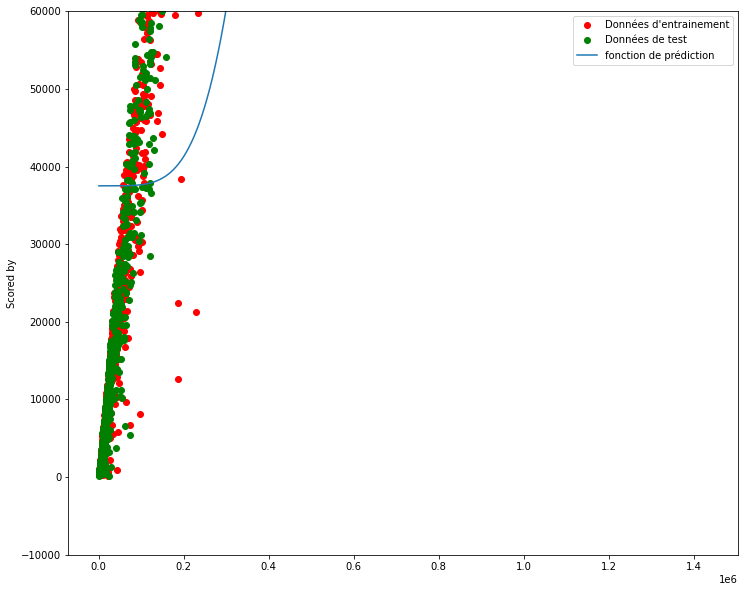

In [192]:
PollyPlot(x_train[['Members']], x_test[['Members']], y_train, y_test, poly,pr)
#la courbe ne suit pas très bien les données

In [193]:
poly.score(x_train_pr, y_train)

0.7825467693702992

In [194]:
poly.score(x_test_pr, y_test)
#Coefficient négatif synonyme de mauvais modèle et d'overfitting, pour pallier ce probème on implémente une méthode de cross validation

-11.418775830681593

Text(2, 0.98, 'R^2 Maximum')

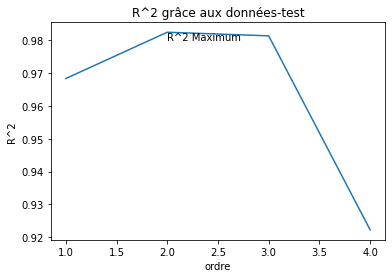

In [195]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['Members']])
    
    x_test_pr = pr.fit_transform(x_test[['Members']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('ordre')
plt.ylabel('R^2')
plt.title('R^2 grâce aux données-test')
plt.text(2, 0.98, 'R^2 Maximum')    
#Le R² augment jusqu'au 2eme ordre puis stagne jusqu'au 3ème ou il continue en chutant

In [196]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['Members']])
    x_test_pr = pr.fit_transform(x_test[['Members']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['Members']], x_test[['Members']], y_train,y_test, poly, pr)

In [197]:
#permet les différentes courbes en fonction des paramètres et trouver le meilleurmodèle de prédiction (ordre 2)
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>